# Miles Per Gallon: Scikit-Learn
Here, we'll try to use scikit-learn to see if we can predict the MPG of my car in 2016 based on the values for 2014 and 2015.

In [1]:
# Import sklearn
import sklearn as sk
print(f'Scikit-learn version: {sk.__version__}')

Scikit-learn version: 0.21.3


In [2]:
# Import the modules
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

## Preping the data
First thing we need to do is to get the inputs into the appropriate format. For this, we will use only columns that are reasonably related to MPG:
* Miles (miles driven)
* Week of year (number in range 1-52)
* Gas Pumped (how much fuel I put in my car)
* Avg Spd (my average speed in miles per hour)

We wont use the shifted week values, because we want to stick as closely as possible to the original data format as possible for simplicity sake.

In [3]:
# Load the data
db = pd.read_pickle('data/data_formatted.pkl')

# Extract the year and week number
db['Year'] = [date.year for date in db.Date]
db['Week'] = [date.weekofyear for date in db.Date]
db = db.drop(['Date','Price/Gal', 'Car MPG', 'paid ($)', 'Price/Barrel', 'Longitude', 'Latitude', 'Car gas', 'notes'], axis=1)
db = db.dropna(subset=['Miles', 'Real MPG'])

# Print column information
db.describe()

,Miles,Gas Pumped,Avg Spd,Real MPG,Year,Week
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,472.226364,13.752591,49.547273,34.343764,2015.063636,25.900000
std,38.167070,0.466273,5.227428,2.612735,0.911469,16.413214
min,383.000000,11.387000,34.500000,27.720000,2013.000000,1.000000
25%,447.925000,13.483250,46.825000,32.464250,2014.000000,10.250000
50%,474.300000,13.746500,49.200000,34.368500,2015.000000,27.000000
75%,505.450000,14.081500,51.675000,36.410000,2016.000000,40.750000
max,540.800000,14.677000,68.600000,39.665000,2017.000000,53.000000


In [4]:
# Extract training and testing samples
train = db[(db.Year >= 2014) & (db.Year <= 2015)]
test  = db[(db.Year == 2016)]

# Split out the features (x) and true values (y)
train_x = train.drop(['Real MPG','Year'], axis=1)
train_y = train['Real MPG']
test_x  = test.drop(['Real MPG','Year'], axis=1)
test_y  = test['Real MPG']

## Machine Learning (Scikit-Learn)
Now comes the machine learning part! Let's put it into a [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor). Because the desired output is a continuous value, I'm using a regression formula here.

In [5]:
# Import the random forest regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics  import mean_absolute_error

# Construct the model and run the fit
model = RandomForestRegressor(random_state=1, n_estimators=100, criterion='mae')
model.fit(train_x, train_y)

# Make some predictions form our test data
mpg_preds = model.predict(test_x)
print(f'Mean absolute error: {mean_absolute_error(test_y, mpg_preds)} mpg')

Mean absolute error: 0.8007290909090822 mpg


## Visualizing the predictions
So it looks like we can predict the MPG to within +/- 0.8 MPG. That's pretty fantastic! So what does this look like?

Trend line : Blue
Perfect fit: Black


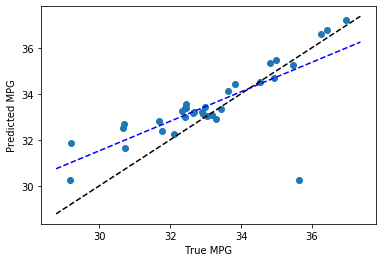

In [6]:
plt.scatter(test_y, mpg_preds)
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')

# Add a trend line and best fit line
trend    = np.poly1d( np.polyfit(test_y, mpg_preds, 1) )
best_fit = np.poly1d([1,0.0])
xlim = plt.xlim()
plt.plot(xlim, trend(xlim),"b--")
plt.plot(xlim, best_fit(xlim), color='black', linestyle='--')
print('Trend line : Blue')
print('Perfect fit: Black')

plt.show()

And just for kicks let's plot the prediction and true values over time

Text(0.5, 0, 'Prediction - True (MPG)')

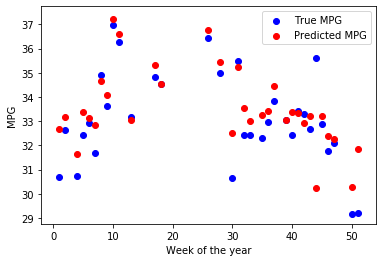

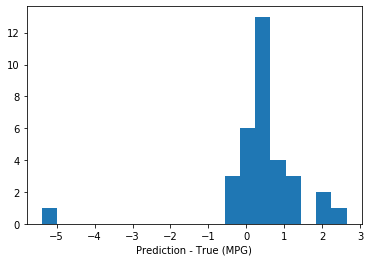

In [7]:
plt.figure()
plt.scatter(test_x.Week, test_y, color='blue', label='True MPG')
plt.scatter(test_x.Week, mpg_preds, color='red', label='Predicted MPG')
plt.xlabel('Week of the year')
plt.ylabel('MPG')
leg = plt.legend()

plt.figure()
error = mpg_preds - test_y
plt.hist(error, bins=20)
plt.xlabel('Prediction - True (MPG)')

We have one really terrible prediction, but overall not too shabby if I do say so myself!